In [27]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression,SGDRegressor

from sklearn.preprocessing import PolynomialFeatures,StandardScaler

from sklearn.metrics import r2_score

from sklearn.pipeline import Pipeline

# 2D Polynomial Regression

In [28]:
X = 6 * np.random.rand(200,1) - 3
y = (0.8 * X**2) + (0.9 * X) + 2 + (np.random.randn(200,1))

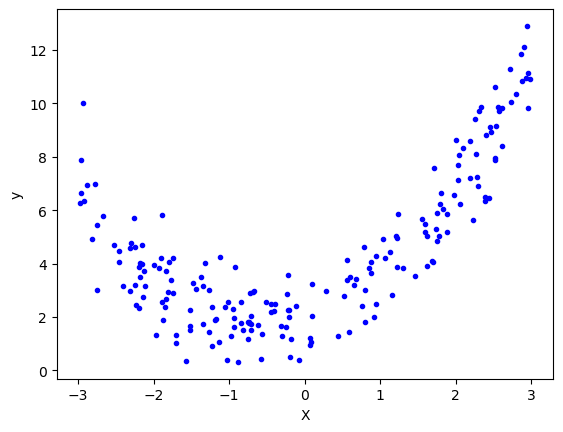

In [29]:
plt.plot(X,y,'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

### Linear Regression

In [31]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
r2_score(y_test, y_pred)

0.38117208861798346

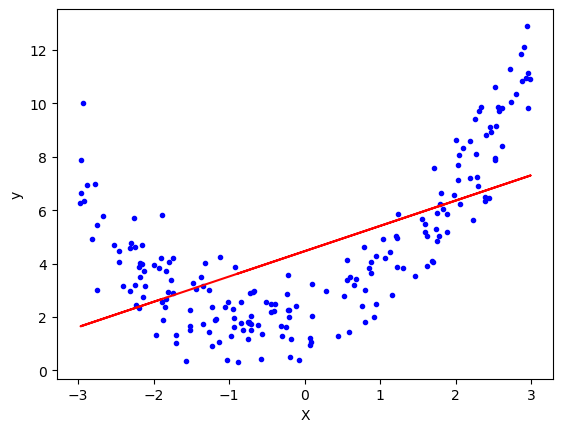

In [32]:
plt.plot(X,y,'b.')
plt.plot(X_train, lr.predict(X_train), color='red')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [33]:
lr.intercept_, lr.coef_

(array([4.4617909]), array([[0.94742678]]))

### Polynomial Regression

In [34]:
poly = PolynomialFeatures(degree=2,include_bias=True)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [35]:
print(X_train[0])
print(X_train_trans[0])

[-0.88515656]
[ 1.         -0.88515656  0.78350213]


In [36]:
X_train.shape, X_train_trans.shape

((160, 1), (160, 3))

In [37]:
lr = LinearRegression()
lr.fit(X_train_trans,y_train)
y_pred = lr.predict(X_test_trans)

In [38]:
r2_score(y_test, y_pred)

0.8959921608665458

In [39]:
lr.intercept_, lr.coef_

(array([2.01901472]), array([[0.        , 0.81140124, 0.78328541]]))

In [40]:
X_new = np.linspace(-3,3,200).reshape(200,1)
X_new_polynomial = poly.transform(X_new)
y_pred = lr.predict(X_new_polynomial)
y_pred

array([[ 6.63437966],
       [ 6.5178562 ],
       [ 6.40275687],
       [ 6.28908165],
       [ 6.17683056],
       [ 6.06600358],
       [ 5.95660072],
       [ 5.84862198],
       [ 5.74206737],
       [ 5.63693687],
       [ 5.53323049],
       [ 5.43094823],
       [ 5.33009008],
       [ 5.23065606],
       [ 5.13264616],
       [ 5.03606038],
       [ 4.94089871],
       [ 4.84716117],
       [ 4.75484774],
       [ 4.66395844],
       [ 4.57449325],
       [ 4.48645218],
       [ 4.39983523],
       [ 4.3146424 ],
       [ 4.23087369],
       [ 4.1485291 ],
       [ 4.06760863],
       [ 3.98811228],
       [ 3.91004005],
       [ 3.83339194],
       [ 3.75816794],
       [ 3.68436807],
       [ 3.61199231],
       [ 3.54104068],
       [ 3.47151316],
       [ 3.40340977],
       [ 3.33673049],
       [ 3.27147533],
       [ 3.20764429],
       [ 3.14523737],
       [ 3.08425457],
       [ 3.02469589],
       [ 2.96656133],
       [ 2.90985089],
       [ 2.85456456],
       [ 2

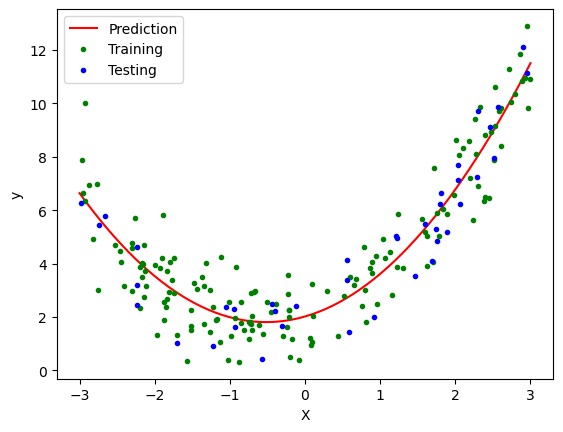

In [41]:
plt.plot(X_new,y_pred,'r-',label='Prediction')
plt.plot(X_train,y_train,'g.',label='Training')
plt.plot(X_test,y_test,'b.',label='Testing')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

# 3D Polynomial Regression

In [42]:
x = 7 * np.random.rand(100, 1) - 2.8
y = 7 * np.random.rand(100, 1) - 2.8

z = x**2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y +2 + np.random.randn(100, 1)

In [43]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())
fig.show()

### Linear Regression

In [44]:
np.array([x, y]).shape

(2, 100, 1)

In [45]:
lr =LinearRegression()
X_multi = np.array([x, y]).reshape(100,2)
lr.fit(X_multi, z)

LinearRegression()

In [46]:
X_input = np.linspace(x.min(), x.max(), 10)
y_input = np.linspace(y.min(), y.max(), 10)
xGrid, yGrid = np.meshgrid(X_input,y_input)

final = np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T

z_final = lr.predict(final).reshape(10,10)

In [47]:
import plotly.graph_objects as go

fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = X_input, y = y_input, z =z_final ))

fig.show()

### Polynomial Regression

In [48]:
X_multi = np.array([x, y]).reshape(100, 2)
X_multi.shape

(100, 2)

In [52]:
poly = PolynomialFeatures(degree=10)
X_multi_trans = poly.fit_transform(X_multi)

In [53]:
print("Input", poly.n_features_in_)
print("Ouput", poly.n_output_features_)
print("Powers\n", poly.powers_)

Input 2
Ouput 66
Powers
 [[ 0  0]
 [ 1  0]
 [ 0  1]
 [ 2  0]
 [ 1  1]
 [ 0  2]
 [ 3  0]
 [ 2  1]
 [ 1  2]
 [ 0  3]
 [ 4  0]
 [ 3  1]
 [ 2  2]
 [ 1  3]
 [ 0  4]
 [ 5  0]
 [ 4  1]
 [ 3  2]
 [ 2  3]
 [ 1  4]
 [ 0  5]
 [ 6  0]
 [ 5  1]
 [ 4  2]
 [ 3  3]
 [ 2  4]
 [ 1  5]
 [ 0  6]
 [ 7  0]
 [ 6  1]
 [ 5  2]
 [ 4  3]
 [ 3  4]
 [ 2  5]
 [ 1  6]
 [ 0  7]
 [ 8  0]
 [ 7  1]
 [ 6  2]
 [ 5  3]
 [ 4  4]
 [ 3  5]
 [ 2  6]
 [ 1  7]
 [ 0  8]
 [ 9  0]
 [ 8  1]
 [ 7  2]
 [ 6  3]
 [ 5  4]
 [ 4  5]
 [ 3  6]
 [ 2  7]
 [ 1  8]
 [ 0  9]
 [10  0]
 [ 9  1]
 [ 8  2]
 [ 7  3]
 [ 6  4]
 [ 5  5]
 [ 4  6]
 [ 3  7]
 [ 2  8]
 [ 1  9]
 [ 0 10]]


In [54]:
lr = LinearRegression()
lr.fit(X_multi_trans, z)
X_test_multi = poly.transform(final)
z_final = lr.predict(X_multi_trans).reshape(10, 10)
fig = px.scatter_3d(x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x=X_input, y=y_input, z=z_final))

fig.update_layout(scene=dict(zaxis=dict(range=[0, 35])))

fig.show()